# Matrix multiplication from scratch

The idea is to use as little external libraries as possible - rely on native Python.

## Get the data - MNIST

In [98]:
#| default_exp matmul

In [96]:
import urllib.request
from pathlib import Path

In [97]:
MNIST_URL = "https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true"

In [4]:
# Create data path
data_path = Path("../data")
data_path.mkdir(parents=True, exist_ok=True)

In [5]:
data_path

PosixPath('../data')

In [99]:
# Download data
data_gz = data_path/"mnist.pkl.gz"
if not data_gz:
    urllib.request.urlretrieve(MNIST_URL, data_path/"mnist.pkl.gz")
data_gz

Path('../data/mnist.pkl.gz')

In [7]:
!ls -la ../data

total 16656
drwxr-xr-x 1 master master       24 Mar  5 09:53 .
drwxr-xr-x 1 master master      266 Mar  5 10:52 ..
-rw-r--r-- 1 master master 17051982 Mar  5 09:53 mnist.pkl.gz


## Unzip

In [8]:
import gzip, pickle

In [9]:
with gzip.open(data_gz, mode='rb') as unzip_data:
    obj = pickle.load(unzip_data, encoding="latin-1")
    ((x_train, y_train), (x_valid, y_valid), _) = obj # Destructuring

In [10]:
list(x_train[0])[:20] # First image

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [11]:
len(x_train[0]) # 28x28 - flattened list

784

In [12]:
list1 = list(x_train[0])
vals_1 = list1[200: 210]
vals_1

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

## Create array of 28x28

In [13]:
#| export
def chuncks(list_vals, step):
    """
    Is an iterator to return chuncks of list values
    """
    for i in range(0, len(list_vals), step):
        yield list_vals[i:i+step]

In [14]:
vals_1_iter = chuncks(vals_1, 5)

You need to define the iterator so that it keeps returns the next values instead of reseting.

In [15]:
next(vals_1_iter)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [16]:
next(vals_1_iter)

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

If you apply `list()` on the `iterator` it will return all the values.

In [17]:
first_image_array = list(chuncks(x_train[0], 28)) # Return all values at once

In [18]:
len(first_image_array), len(first_image_array[0])

(28, 28)

In [19]:
first_image_array

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01171875, 0.0703125 , 0.0703125 ,
        0.0703125 , 0.4921875 , 0.53125   , 0.68359375, 0.1015625 ,
   

In [20]:
# Show first image: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow

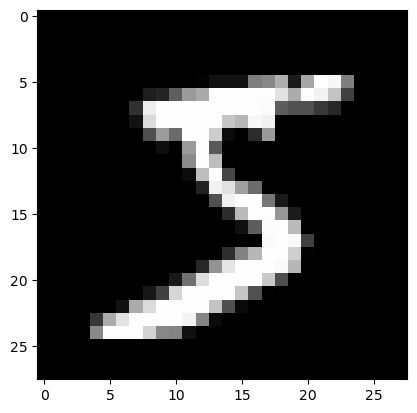

In [21]:
import matplotlib
import matplotlib.pyplot
matplotlib.pyplot.imshow(list(chuncks(x_train[0], 28)), cmap="gray")

In [22]:
# Conveniences
import matplotlib.pyplot as plt
import matplotlib as mpl

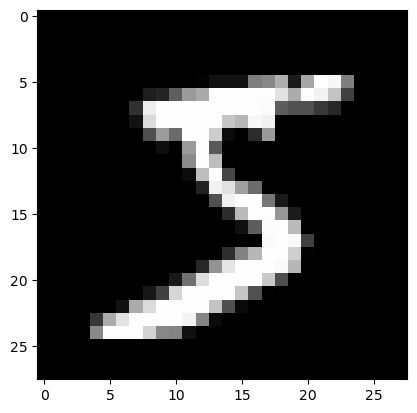

In [23]:
mpl.rcParams["image.cmap"] = "gray"
plt.imshow(first_image_array)

#### Hint of itertools

Since we're not using `numpy` we implement it from scratch.

Iterators create the yield the list values when requested instead of storing them all in memory - lazy loading.

In [24]:
vals_10 = chuncks(list1[200: 210], 1)

In [25]:
next(vals_10)

[0.0]

In [26]:
next(vals_10)

[0.0]

In [27]:
next(vals_10)

[0.0]

In [28]:
next(vals_10)

[0.19140625]

In [29]:
next(vals_10)

[0.9296875]

In [30]:
from itertools import islice

On its own, `islice()` returns an iterable, but if you call `list` on it, it will return all the items of the iterable - ot until the `step`.

In [31]:
it = iter(vals_1)

In [32]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [33]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

We can take any `list` and turn it into an `iterator` by passing it to `iter()`.

In [34]:
lst1 = list(x_train[0])
it1 = iter(lst1)

In [35]:
img = list(iter(lambda: list(islice(it1, 28)), []))

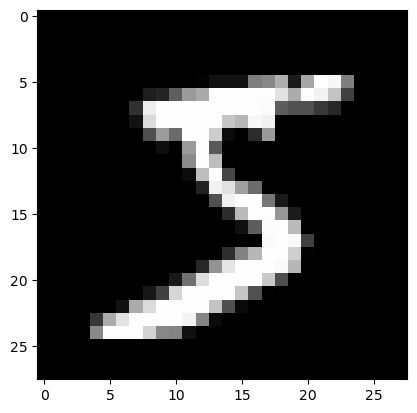

In [36]:
plt.imshow(img)

---

## Matrix and Tensor


In [37]:
type(img)

list

In [38]:
img[20][10]

0.09375

We can index the list like above, however, we want to be able to index matrixes using `img[20, 10]` - like `numpy`. Eseentially, we're rewriteing the functionality of `numpy` because the challenge is that we cannot use it.

We need to write a class which can support that indexing.

In [39]:
class Matrix:
    
    def __init__(self, xs):
        self.xs = xs
        
    def __getitem__(self, idxs):
        x = idxs[0]
        y = idxs[1]
        return self.xs[x][y]

In [40]:
matrix_img = Matrix(img)

In [41]:
matrix_img[20, 10]

0.09375

In [42]:
import torch

In [43]:
img_tensor = torch.tensor(img)
img_tensor

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [44]:
img_tensor[20, 10]

tensor(0.0938)

Now we can convert all of our lists into tensors.

In [45]:
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [46]:
x_train.shape, x_train.type(), x_train.dtype

(torch.Size([50000, 784]), 'torch.FloatTensor', torch.float32)

[Tensor](https://pytorch.org/docs/stable/tensors.html)

In [47]:
imgs = x_train.reshape(-1, 28, 28)
imgs.shape

torch.Size([50000, 28, 28])

In [48]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

## Matrix multiplication

Same as Ch. 17 from the book.

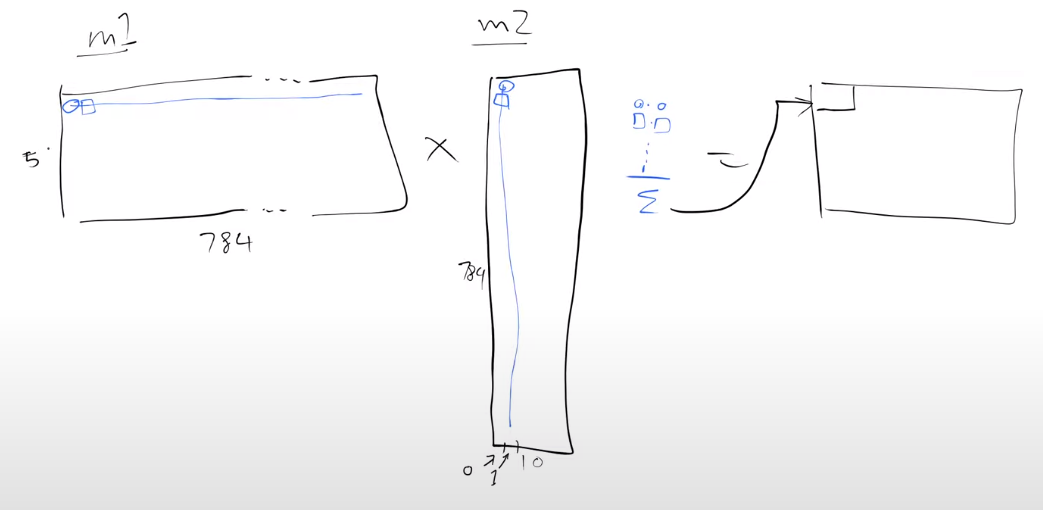

In [49]:
m1 = x_train[:5]
m1.shape

torch.Size([5, 784])

In [50]:
torch.manual_seed(1)
m2 = torch.rand(size=(784, 10)) # Where 10 is the number of categories in MNIST

In [51]:
m1.shape, m2.shape # ij*jk -> ik Einsum notation

(torch.Size([5, 784]), torch.Size([784, 10]))

### Simplest algorithmic implementation

In [52]:
def matmul_v1(x, w):
    """
    THe simplest algorithmic implementation of matrix multiplication.
    """
    xn_row, xn_col = x.shape
    wn_row, wn_col = w.shape
    assert xn_col == wn_row # j == j
    c = torch.zeros(size=(xn_row, wn_col))
    for i in range(xn_row): # 5 == batch size
        for j in range(wn_col): # 10 == nof neurons/activations
            for k in range(xn_col): # 784 == nof inputs
                c[i, j] += x[i, k] * w[k, j]
    return c

In [53]:
c = matmul_v1(m1, m2)
c.shape

torch.Size([5, 10])

In [54]:
c

tensor([[52.7774, 50.3767, 57.5645, 57.7793, 53.7955, 53.4711, 49.9727, 58.7308,
         56.3193, 51.4459],
        [60.7401, 57.7876, 64.7599, 60.3333, 60.7426, 60.8447, 58.3185, 64.3140,
         66.0909, 56.5163],
        [40.0340, 39.8945, 39.5935, 37.4960, 32.1075, 39.2020, 35.5282, 35.8848,
         35.2594, 37.4396],
        [35.0578, 29.6682, 35.5702, 32.7924, 34.3430, 36.6999, 31.0991, 33.0383,
         33.4259, 32.5791],
        [46.1151, 42.3057, 50.7886, 44.8071, 43.2603, 41.6379, 42.2743, 45.7456,
         48.9296, 42.9046]])

In [55]:
# Handy to use in all notebook as it modifies the printing options for tensors
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)

In [56]:
c

tensor([[52.78, 50.38, 57.56, 57.78, 53.80, 53.47, 49.97, 58.73, 56.32, 51.45],
        [60.74, 57.79, 64.76, 60.33, 60.74, 60.84, 58.32, 64.31, 66.09, 56.52],
        [40.03, 39.89, 39.59, 37.50, 32.11, 39.20, 35.53, 35.88, 35.26, 37.44],
        [35.06, 29.67, 35.57, 32.79, 34.34, 36.70, 31.10, 33.04, 33.43, 32.58],
        [46.12, 42.31, 50.79, 44.81, 43.26, 41.64, 42.27, 45.75, 48.93, 42.90]])

### Elementwise arithmetic

In [57]:
def matmul_v2(x, w):
    """
    Accelerated algorithmic implementation of matrix multiplication using elementwise arithmetic.
    """
    xn_row, xn_col = x.shape
    wn_row, wn_col = w.shape
    assert xn_col == wn_row # j == j
    c = torch.zeros(size=(xn_row, wn_col))
    for i in range(xn_row): # 5 == batch size
        for j in range(wn_col): # 10 == nof neurons/activations
            c[i, j] += (x[i, :] * w[:, j]).sum()
            # c[i, j] += (x[i] * w[:, j]).sum() # Same result
    return c

In [58]:
c = matmul_v2(m1, m2)
c.shape

torch.Size([5, 10])

In [59]:
c

tensor([[52.78, 50.38, 57.56, 57.78, 53.80, 53.47, 49.97, 58.73, 56.32, 51.45],
        [60.74, 57.79, 64.76, 60.33, 60.74, 60.84, 58.32, 64.31, 66.09, 56.52],
        [40.03, 39.89, 39.59, 37.50, 32.11, 39.20, 35.53, 35.88, 35.26, 37.44],
        [35.06, 29.67, 35.57, 32.79, 34.34, 36.70, 31.10, 33.04, 33.43, 32.58],
        [46.12, 42.31, 50.79, 44.81, 43.26, 41.64, 42.27, 45.75, 48.93, 42.90]])

### Broadcasating

What if you have arrays if different shapes?

I find this notion tricky to grasp, so I look into it from the video tutorials: https://youtu.be/_TMhP1VExVQ?t=7393

PyTorch broadcasting rules: https://pytorch.org/docs/stable/notes/broadcasting.html

In [60]:
a = torch.tensor((10, 20, 30))
b = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [61]:
# a has a matching dimension and a missing one so it's broadcastable
a.shape, b.shape

(torch.Size([3]), torch.Size([3, 3]))

In [62]:
a + b

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

What happens during broadcasting:

In [63]:
t = a.expand_as(b)
t

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

#### Matmul with broadcasting

We can see the shapes of `m1, m2` don't match, so broadcasting is impossible on first look.

In [64]:
m1.shape, m2.shape # 

(torch.Size([5, 784]), torch.Size([784, 10]))

In [65]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [66]:
digit[:,None].shape

torch.Size([784, 1])

In [67]:
digit[:, None].expand_as(m2).shape

torch.Size([784, 10])

In [68]:
# So multiplication is now possible like this:
(digit[:,None]*m2).shape

torch.Size([784, 10])

That means that `digit` has been expanded to match the number of neurons in `m2`.

**However, notice the dimension upon which we are adding the matrixes - we are adding them across the 784 rows**

In [69]:
def matmul_v3(x, w):
    """
    Accelerated algorithmic implementation of matrix multiplication using elementwise arithmetic and broadcasting.
    """
    xn_row, xn_col = x.shape
    wn_row, wn_col = w.shape
    assert xn_col == wn_row # j == j
    c = torch.zeros(size=(xn_row, wn_col))
    for i in range(xn_row): # 5 == batch size
        c[i] = (x[i,:,None] * w).sum(dim=0)
    return c

In [70]:
c = matmul_v3(m1, m2)

In [71]:
c.shape

torch.Size([5, 10])

In [72]:
c

tensor([[52.78, 50.38, 57.56, 57.78, 53.80, 53.47, 49.97, 58.73, 56.32, 51.45],
        [60.74, 57.79, 64.76, 60.33, 60.74, 60.84, 58.32, 64.31, 66.09, 56.52],
        [40.03, 39.89, 39.59, 37.50, 32.11, 39.20, 35.53, 35.88, 35.26, 37.44],
        [35.06, 29.67, 35.57, 32.79, 34.34, 36.70, 31.10, 33.04, 33.43, 32.58],
        [46.12, 42.31, 50.79, 44.81, 43.26, 41.64, 42.27, 45.75, 48.93, 42.90]])

In [73]:
help(torch.Tensor.sum)

Help on method_descriptor:

sum(...)
    sum(dim=None, keepdim=False, dtype=None) -> Tensor
    
    See :func:`torch.sum`



The video does a decent job at explaining things, however, I still find this technique tricky to grasp.

Now, let's use our `matmul_v3` on the whole dataset. It should be faster than all the previous implementations.

In [74]:
weights = m2
test_tensor = matmul_v3(x_train, weights)
test_tensor.shape

torch.Size([50000, 10])

A little speed comparison

In [75]:
%time _ = matmul_v1(m1, m2)

CPU times: user 464 ms, sys: 2.66 ms, total: 466 ms
Wall time: 465 ms


In [76]:
%time _ = matmul_v2(m1, m2)

CPU times: user 2.8 ms, sys: 0 ns, total: 2.8 ms
Wall time: 2.46 ms


In [77]:
%time _ = matmul_v3(m1, m2)

CPU times: user 381 µs, sys: 35 µs, total: 416 µs
Wall time: 277 µs


### Einstein summation

The rules of Einstein summation notation are as follows:

1. Repeated indices between input matrices means that values along those axes are multiplied together.
2. Repeated indices on the left side are implicitly summed over if they are not on the right side.
3. Each index can appear at most twice on the left side.
4. The unrepeated indices on the left side must appear on the right side.

**Example**

If we perform a matrix multiplication between 2 matrixes with the following sizes.

`[i,j] * [j, k] -> [i, k]`

`einsum` usage:

In [78]:
# This does matrix multiplication because it's missing the j index (summed over - nation 1)
torch.einsum("ij,jk->ik",m1, m2)

tensor([[52.78, 50.38, 57.56, 57.78, 53.80, 53.47, 49.97, 58.73, 56.32, 51.45],
        [60.74, 57.79, 64.76, 60.33, 60.74, 60.84, 58.32, 64.31, 66.09, 56.52],
        [40.03, 39.89, 39.59, 37.50, 32.11, 39.20, 35.53, 35.88, 35.26, 37.44],
        [35.06, 29.67, 35.57, 32.79, 34.34, 36.70, 31.10, 33.04, 33.43, 32.58],
        [46.12, 42.31, 50.79, 44.81, 43.26, 41.64, 42.27, 45.75, 48.93, 42.90]])

In the case above, `j` is present on the left side and repeated between the input matrces. That implies that values along those axes are multiplied together.

Also `j` is not present on the right hand side. That implies that values across that index are summed over.

In [79]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [80]:
# This adheres to the initial notation of einsum
torch.einsum("ij,jk->ijk",m1, m2).shape

torch.Size([5, 784, 10])

In this case, the `j` index was not summed over and its present in the resulting einsum matrix.

Let's assume that we want to perform a matrix multiplication using `einsum` in this case.

In [81]:
einsum_mm = torch.einsum("ij,jk->ik", m1, m2)
einsum_mm.shape

torch.Size([5, 10])

In [82]:
%time _ = torch.einsum("ij,jk->ik", m1, m2)

CPU times: user 1.12 ms, sys: 0 ns, total: 1.12 ms
Wall time: 256 µs


In [83]:
%time _ = torch.einsum("ij,jk->ik", x_train, weights)

CPU times: user 36.5 ms, sys: 2.49 ms, total: 39 ms
Wall time: 9.69 ms


### matmul with pytorch

`PyTorch` has an optimized matrix multiplication operator: `@`.

In [84]:
(m1 @ m2).shape

torch.Size([5, 10])

In [85]:
%time _ = (m1 @ m2)

CPU times: user 308 µs, sys: 28 µs, total: 336 µs
Wall time: 83.4 µs


Let's run `pytorch.matmul` for the whole training set.

In [86]:
%timeit -n 5 _=torch.matmul(x_train, weights)

9.16 ms ± 766 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [87]:
%time _ = torch.matmul(x_train, m2)

CPU times: user 37.1 ms, sys: 0 ns, total: 37.1 ms
Wall time: 9.15 ms


### matmul with CUDA

Use the NVIDIA GPU to compute matrix multiplication in parallel.

In [88]:
def matmul_grid(grid, a, b, c):
    """
    Populates matmul result of a,b in the grid location of c matrix.
    """
    i, j = grid
    if i < c.shape[0] and j < c.shape[1]:
        res = 0.
        for k in range(a.shape[1]):
            res += a[i, k] * b[k, j]
        c[i, j] = res

In [89]:
m1n_row, m1n_col = m1.shape
m2n_row, m2n_col = m2.shape
m3_res = torch.zeros(size=(m1n_row, m2n_col))

In [90]:
matmul_grid((0, 0), m1, m2, m3_res)
m3_res

tensor([[52.78,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00]])

None of the locations in the resulting matrix interract with each other. That, immediately means we can run the operations in parallel on all the grid locations.

Something which can calculate an output on the GPU is called a kernel. So, we have teh following function:

In [91]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y):
            kernel((i, j), *args, **kwargs) # We call the matmul_grid() here

In [92]:
kernel_res = torch.zeros(size=(m1n_row, m2n_col))
launch_kernel(matmul_grid, m1n_row, m2n_col, m1, m2, kernel_res)
kernel_res, kernel_res.shape

(tensor([[52.78, 50.38, 57.56, 57.78, 53.80, 53.47, 49.97, 58.73, 56.32, 51.45],
         [60.74, 57.79, 64.76, 60.33, 60.74, 60.84, 58.32, 64.31, 66.09, 56.52],
         [40.03, 39.89, 39.59, 37.50, 32.11, 39.20, 35.53, 35.88, 35.26, 37.44],
         [35.06, 29.67, 35.57, 32.79, 34.34, 36.70, 31.10, 33.04, 33.43, 32.58],
         [46.12, 42.31, 50.79, 44.81, 43.26, 41.64, 42.27, 45.75, 48.93, 42.90]]),
 torch.Size([5, 10]))

The above is not really calculated in the GPU... yet.

To make it run on the GPU we're going to use `numba` - a compiler which compiles the code to run on the GPU.

Parts of this implementation are not fully explained.

In [93]:
from numba import cuda
import math

ModuleNotFoundError: No module named 'numba'

In [ ]:
@cuda.jit
def matmul_cuda(a, b, c):
    """
    Populates matmul result of a,b in the grid location of c matrix.
    """
    i, j = cuda.grid(2) # How many dimensions the grid has
    if i < c.shape[0] and j < c.shape[1]:
        res = 0.
        for k in range(a.shape[1]):
            res += a[i, k] * b[k, j]
        c[i, j] = res

In [ ]:
res_cuda = torch.zeros(size=(x_train.shape[0], m2n_col))
res_cuda.shape, weights.shape

We need to load the parameters to the GPU:

In [ ]:
m1_cuda, m2_cuda, res_cuda = map(cuda.to_device, (x_train, weights, res_cuda))

In [ ]:
res_cuda.shape

In [ ]:
# This is the unexplained part
TPB = 16
rr,rc = res_cuda.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
blockspergrid

Now we're going to call the equivalent of `launch_kernel()`.

In [ ]:
matmul_cuda[blockspergrid, (TPB, TPB)](m1_cuda, m2_cuda, res_cuda)

The results are now in the GPU, so we need to copy them back to the CPU.

In [ ]:
res_cpu = res_cuda.copy_to_host()
res_cpu.shape

In [ ]:
%time _ = matmul_cuda[blockspergrid, (TPB, TPB)](m1_cuda, m2_cuda, res_cuda); res_cpu = res_cuda.copy_to_host()

In [ ]:
%%timeit -n 5
matmul_cuda[blockspergrid, (TPB, TPB)](m1_cuda, m2_cuda, res_cuda)
res_cpu = res_cuda.copy_to_host()

The trick is that we can load any tensor to the `GPU` by using the `.cuda()` method on it.

THis essentially allows us to use the `pytorch @` operator on the `GPU`.

In [ ]:
m1cuda, m2cuda = x_train.cuda(), weights.cuda()
rcuda = (m1cuda @ m2cuda).cpu()

In [ ]:
%time _ = rcuda = (m1cuda @ m2cuda).cpu()

You need to be running stuff on the GPU!

In [94]:
#| hide
import nbdev; nbdev.nbdev_export()